In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import utils.satellite_util as ut

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
f = h5py.File('data/assorted_images/satellite_images.h5','r')
print('Keys: %s' % f.keys())
a_group_key = list(f.keys())[0]
data_original = np.array(f['data'])
labels = np.array(f['labels'])
print(f['data'].shape)

Keys: KeysView(<HDF5 file "satellite_images.h5" (mode r)>)
(641, 224, 224, 3)


In [3]:
train_ratio, val_ratio = 0.9, 0.05
X_train = data_original[:int(data_original.shape[0]*train_ratio), ...] # ... means all the other axes
y_train = labels[:int(data_original.shape[0]*train_ratio), ...]

X_val = data_original[int(data_original.shape[0]*train_ratio):int(data_original.shape[0]*(train_ratio+val_ratio)), ...]
y_val = labels[int(data_original.shape[0]*train_ratio):int(data_original.shape[0]*(train_ratio+val_ratio)), ...]

X_test = data_original[int(data_original.shape[0]*(train_ratio+val_ratio)):, ...]
y_test = labels[int(data_original.shape[0]*(train_ratio+val_ratio)):, ...]

In [4]:
import keras
from keras.models import Sequential # Sequential is one of the main models in Keras, which is basically a sequentially stacked series of layers

model = Sequential() # Initialize a Sequential model instance

Using TensorFlow backend.


In [5]:
# this helps to balance the data imbalance
class_weight = {0:1.,
               1:3.}
from keras.layers import Dense
model.add(Dense(units=64,activation='sigmoid',input_dim=150528))
# model.add(Dense(units=64,activation='relu',input_dim=512))
#keras.layers.Dropout(0.7, noise_shape=None, seed=None)
#model.add(Dense(units=32,activation='sigmoid',input_dim=224*224*3))
model.add(Dense(units=32,activation='relu',input_dim=64))
#model.add(keras.layers.Dropout(0.5, noise_shape=None, seed=None))
#model.add(Dense(units=16, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid',input_dim = 32))

In [6]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.SGD(lr=0.001))

In [7]:
X_train_flat = X_train.reshape((-1, 224*224*3)) # -1 means letting NumPy to figure this axis out automatically
X_val_flat = X_val.reshape((-1, 224*224*3))
X_test_flat = X_test.reshape((-1, 224*224*3))

print(X_train_flat.shape)
print(X_val_flat.shape)
print(X_test_flat.shape)
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=50)
# Then use fit() to actually train our model
# epochs is basically how many iterations we want for the update process. The model needs some time to reach the optimal state!
# batch_size is how many images we use each time to estimate the gradient. Remember that the more we use the more accurate each update will be, but it will also be slower
#print(labels)
history = model.fit(X_train_flat, y_train, epochs=20, batch_size=32, validation_data=(X_val_flat, y_val),shuffle=True,class_weight=class_weight,callbacks=[early_stopping])

(576, 150528)
(32, 150528)
(33, 150528)
Train on 576 samples, validate on 32 samples
Epoch 1/20
576/576 [==============================] - 3s 5ms/step - loss: 1.0504 - val_loss: 0.8406
Epoch 2/20
576/576 [==============================] - 2s 4ms/step - loss: 1.0362 - val_loss: 0.7951
Epoch 3/20
576/576 [==============================] - 2s 4ms/step - loss: 1.0233 - val_loss: 0.7772
Epoch 4/20
576/576 [==============================] - 2s 3ms/step - loss: 1.0163 - val_loss: 0.7624
Epoch 5/20
576/576 [==============================] - 2s 3ms/step - loss: 1.0112 - val_loss: 0.7508
Epoch 6/20
576/576 [==============================] - 2s 4ms/step - loss: 1.0074 - val_loss: 0.7417
Epoch 7/20
576/576 [==============================] - 2s 4ms/step - loss: 1.0043 - val_loss: 0.7333
Epoch 8/20
576/576 [==============================] - 2s 4ms/step - loss: 1.0017 - val_loss: 0.7258
Epoch 9/20
576/576 [==============================] - 3s 4ms/step - loss: 0.9995 - val_loss: 0.7189
Epoch 10/20
576

33/33 [==============================] - 0s 2ms/step
The test accuracy is: 0.6802296746860851
The predicted probabilities are: [[0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]
 [0.48968467]]
The predicted class labels are: [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


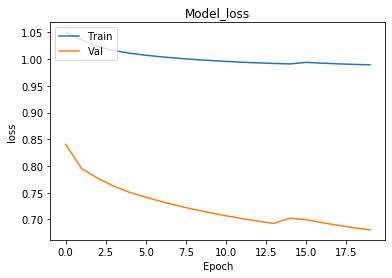

In [12]:
acc = model.evaluate(X_test_flat, y_test)
print('The test accuracy is: {}'.format(acc))

# And make predictions
prob = model.predict(X_test_flat) # These are probabilities, and we want to convert them to class labels
                #print(prob)
label = np.array(prob > 0.5, dtype=int)
            
            #evaluate_acc(model)
print('The predicted probabilities are: {}'.format(prob))
print('The predicted class labels are: {}'.format(label))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('Accuracy')
# plt.ylabel('acc')
# plt.xlabel('Epoch')
# plt.legend(['Train','Val'],loc='upper left')
# plt.show()